<a href="https://colab.research.google.com/github/AndreMaulanaMustofa/PCVK_Genap_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

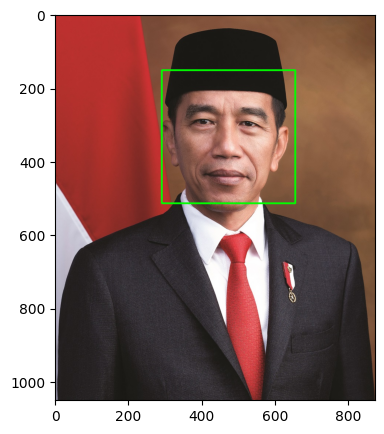

In [3]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_frontalface_alt.xml')

jokowi = cv.imread('/content/drive/MyDrive/Andre/jokowi.jpg')
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(jokowi, (x, y), (x + w, y + h), (0,255,0), 3)
plt.figure(figsize = (5, 5))
plt.imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))

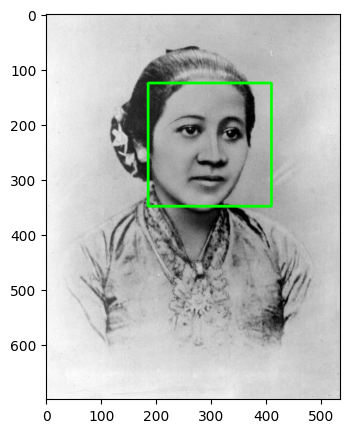

In [4]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_frontalface_alt.xml')

kartini = cv.imread('/content/drive/MyDrive/Andre/kartini.jpg')
roi_wajah = cascade_wajah.detectMultiScale(kartini)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(kartini, (x, y), (x + w, y + h), (0,255,0), 3)
plt.figure(figsize = (5, 5))
plt.imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))

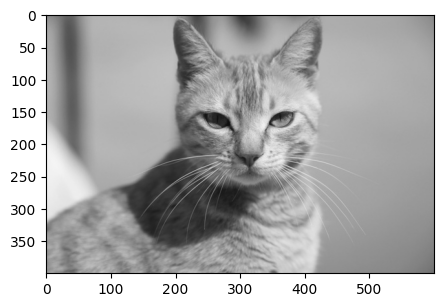

In [5]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_frontalface_alt.xml')

cat = cv.imread('/content/drive/MyDrive/Andre/mycat.jpg', 0)
cat_rgb = cv.cvtColor(cat, cv.COLOR_BGR2RGB)
roi_wajah = cascade_wajah.detectMultiScale(cat_rgb)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(cat_rgb, (x, y), (x + w, y + h), (0,255,0), 3)
plt.figure(figsize = (5, 5))
plt.imshow(cat_rgb)

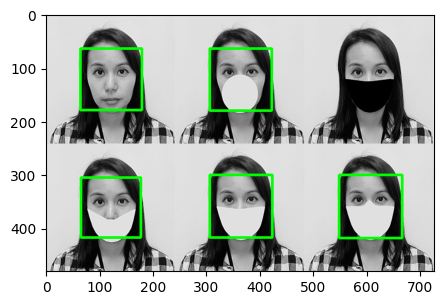

In [6]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_frontalface_alt.xml')

mask = cv.imread('/content/drive/MyDrive/Andre/mask.png', 0)
mask_rectangle = cv.cvtColor(mask, cv.COLOR_GRAY2RGB)
roi_wajah = cascade_wajah.detectMultiScale(mask)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(mask_rectangle, (x, y), (x + w, y + h), (0,255,0), 3)
plt.figure(figsize = (5, 5))
plt.imshow(mask_rectangle)

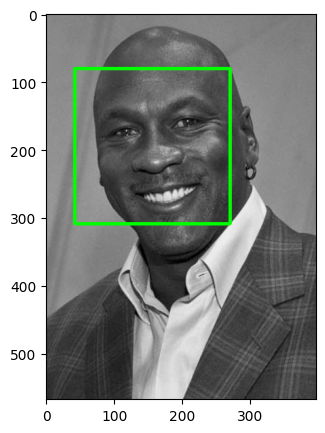

In [7]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_frontalface_alt.xml')

mjordan = cv.imread('/content/drive/MyDrive/Andre/mjordan.jpg', 0)
mjordan_rectangle = cv.cvtColor(mjordan, cv.COLOR_GRAY2RGB)
roi_wajah = cascade_wajah.detectMultiScale(mjordan)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(mjordan_rectangle, (x, y), (x + w, y + h), (0,255,0), 3)
plt.figure(figsize = (5, 5))
plt.imshow(mjordan_rectangle)

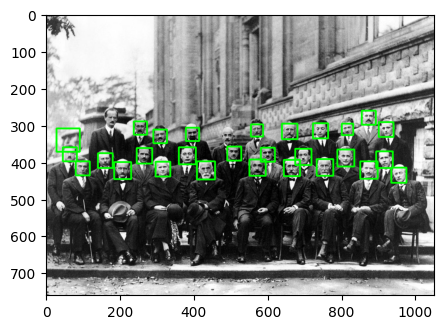

In [8]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_frontalface_alt.xml')

solvay = cv.imread('/content/drive/MyDrive/Andre/solvayconf.jpg', 0)
solvay_rectangle = cv.cvtColor(solvay, cv.COLOR_GRAY2RGB)
roi_wajah = cascade_wajah.detectMultiScale(solvay)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(solvay_rectangle, (x, y), (x + w, y + h), (0,255,0), 3)
plt.figure(figsize = (5, 5))
plt.imshow(solvay_rectangle)

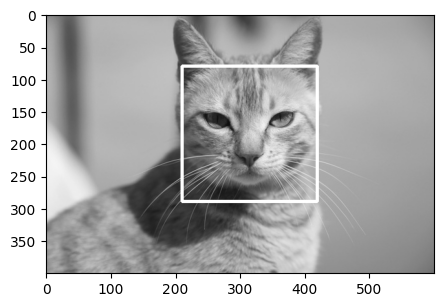

In [9]:
cascade_wajah = cv.CascadeClassifier(cv.data.haarcascades +'haarcascade_frontalcatface.xml')

cat = cv.imread('/content/drive/MyDrive/Andre/mycat.jpg', 0)
cat_rgb = cv.cvtColor(cat, cv.COLOR_BGR2RGB)
roi_wajah = cascade_wajah.detectMultiScale(cat_rgb)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(cat_rgb, (x, y), (x + w, y + h), (255,255,255), 3)
plt.figure(figsize = (5, 5))
plt.imshow(cat_rgb)

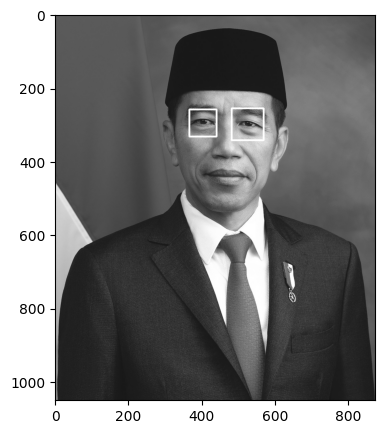

In [10]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_eye.xml')

jokowi = cv.imread('/content/drive/MyDrive/Andre/jokowi.jpg', 0)
jokowi_rgb = cv.cvtColor(jokowi, cv.COLOR_BGR2RGB)
roi_wajah = cascade_wajah.detectMultiScale(jokowi_rgb)
for(x, y, w, h) in roi_wajah:
  cv.rectangle(jokowi_rgb, (x, y), (x + w, y + h), (255,255,255), 3)
plt.figure(figsize = (5, 5))
plt.imshow(jokowi_rgb)

In [11]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import html
import time

In [23]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [24]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [25]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


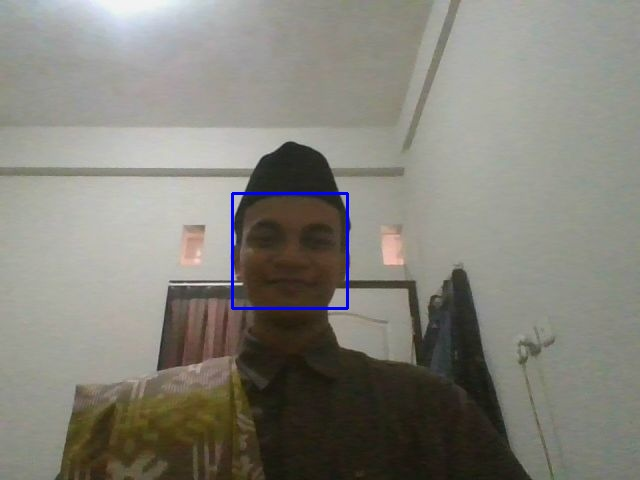

In [30]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

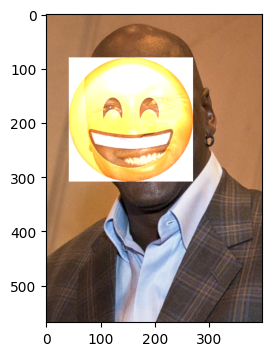

In [56]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_frontalface_alt.xml')

# Load the images
img = cv.imread('/content/drive/MyDrive/Andre/mjordan.jpg')
smile = cv.imread('/content/drive/MyDrive/Andre/smile.png', cv.IMREAD_UNCHANGED)

# Convert the images to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Detect faces
faces = cascade_wajah.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangle around the faces and overlay the smile image
for (x, y, w, h) in faces:
    smile_resized = cv.resize(smile, (w, h))
    img[y:y+h, x:x+w] = cv.addWeighted(img[y:y+h, x:x+w], 1, smile_resized[:, :, 0:3], 1, 0)

# Display the images
plt.figure(figsize=(4, 4))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

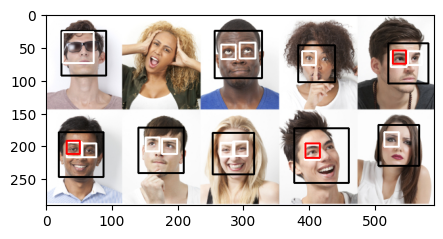

In [58]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_frontalface_alt.xml')

cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_eye.xml')

cascade_matakanan = cv.CascadeClassifier('/content/drive/MyDrive/Andre/haarcascade_righteye_2splits.xml')

# Baca Image
people = cv.imread('/content/drive/MyDrive/Andre/people.jpg',1)

# Detect fitur dan membuat rectangle
roi_wajah = cascade_wajah.detectMultiScale(people)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(people,(x,y),(x+w,y+h),(0, 0, 0), 2)

roi_mata = cascade_mata.detectMultiScale(people)
for(x,y,w,h) in roi_mata:
  cv.rectangle(people,(x,y),(x+w,y+h),(255, 255, 255), 2)

roi_matakanan = cascade_matakanan.detectMultiScale(people)
for(x,y,w,h) in roi_matakanan:
  cv.rectangle(people,(x,y),(x+w,y+h),(0, 0, 255), 2)

# Menampilkan output
plt.figure(figsize = (5,5))
plt.imshow(cv.cvtColor(people, cv.COLOR_BGR2RGB))